# <span style='color:#ff5722'>**Lab 2 Thực hành LinearRegression**</span>



## <span style='color:#607d8b'>**Hãy xây dựng model Hồi quy tuyến tính về dự đoán doanh số bán hàng thông qua các hình thức quảng cáo với tập dữ liệu Advertising.csv**</span>

Yêu cầu:

- **Chuẩn hoá dữ liệu \(2đ\)**
- **Xây dựng 7 mô hình\(1 biến độc lập là 3, 2 biến độc lập là 3 , 3 biến độc lập\) \(7đ\)**
- **Sử dụng R^2 để đánh giá và kết luận \(1đ\)**



In [72]:
# import các thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [73]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv("advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [74]:
# Chuẩn hoá dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['TV', 'Radio', 'Newspaper']])
scaled_data = pd.DataFrame(scaled_features, columns=['TV', 'Radio', 'Newspaper'])
scaled_data['Sales'] = data['Sales']

In [75]:
corr_matrix2 = data.corr()
corr_matrix2

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [77]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

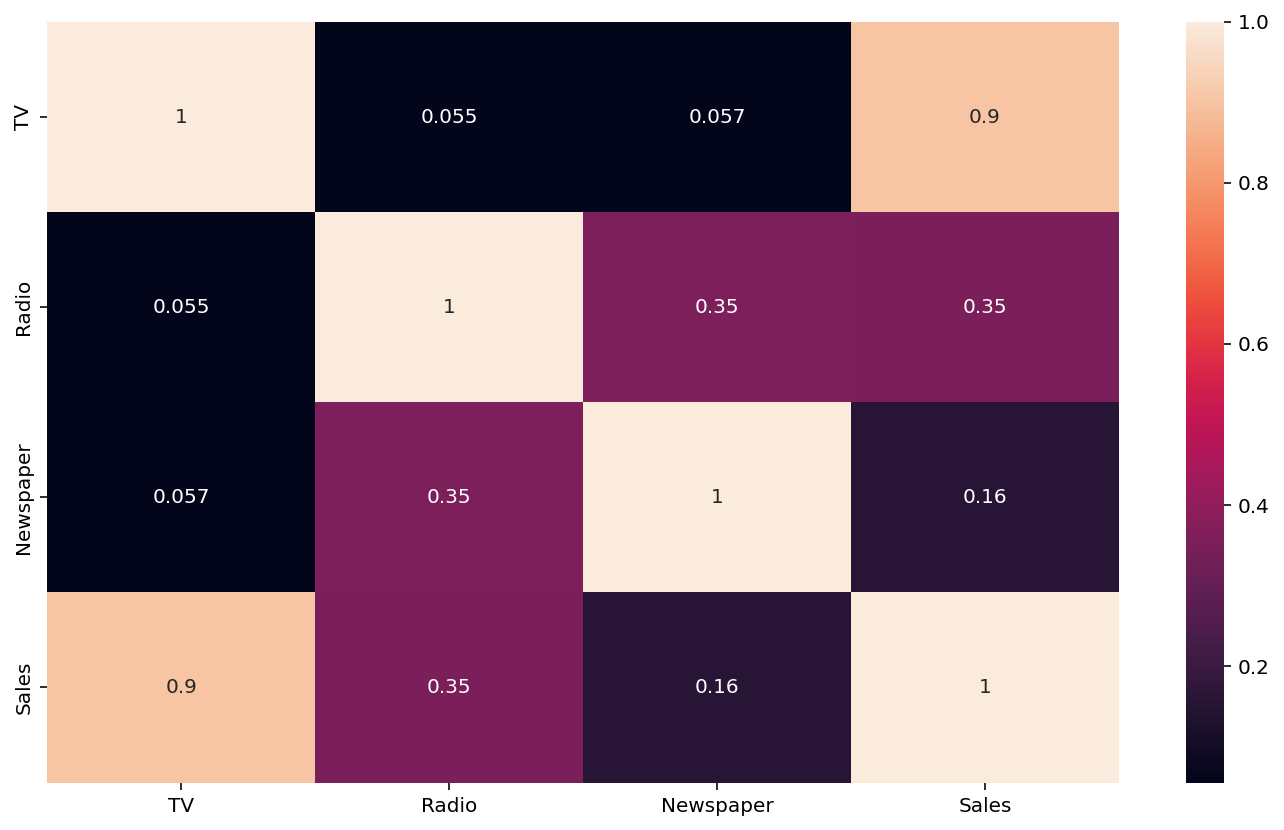

In [78]:
# Hiển thị ma trận tương quan
corr_matrix2 = data.corr()
sns.heatmap(corr_matrix2, annot=True)
plt.show()

[Text(0, 0, 'TV'),
 Text(1, 0, 'Radio'),
 Text(2, 0, 'Newspaper'),
 Text(3, 0, 'Sales')]

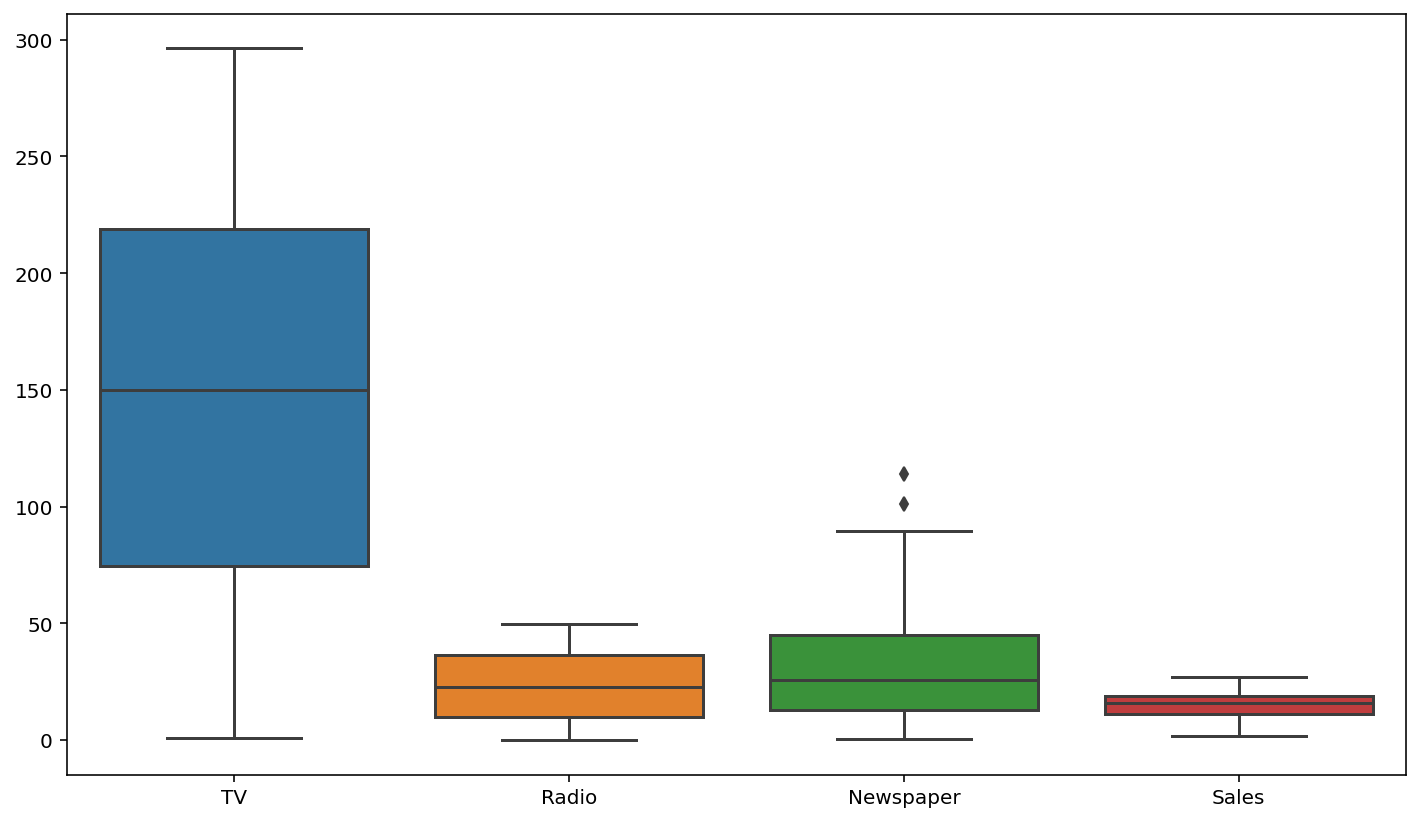

In [79]:
fig = sns.boxplot(data=data)
fig.set_xticks(range(4))
fig.set_xticklabels(['TV','Radio','Newspaper', 'Sales'])

## **Khai báo cho mô hình 1 biến độc lập**



In [80]:
x1=data[["TV","Sales"]]
x2=data[["Radio","Sales"]]
x3=data[["Newspaper","Sales"]]

# <span style='color:#607d8b'>**Mô hình 1: TV**</span>



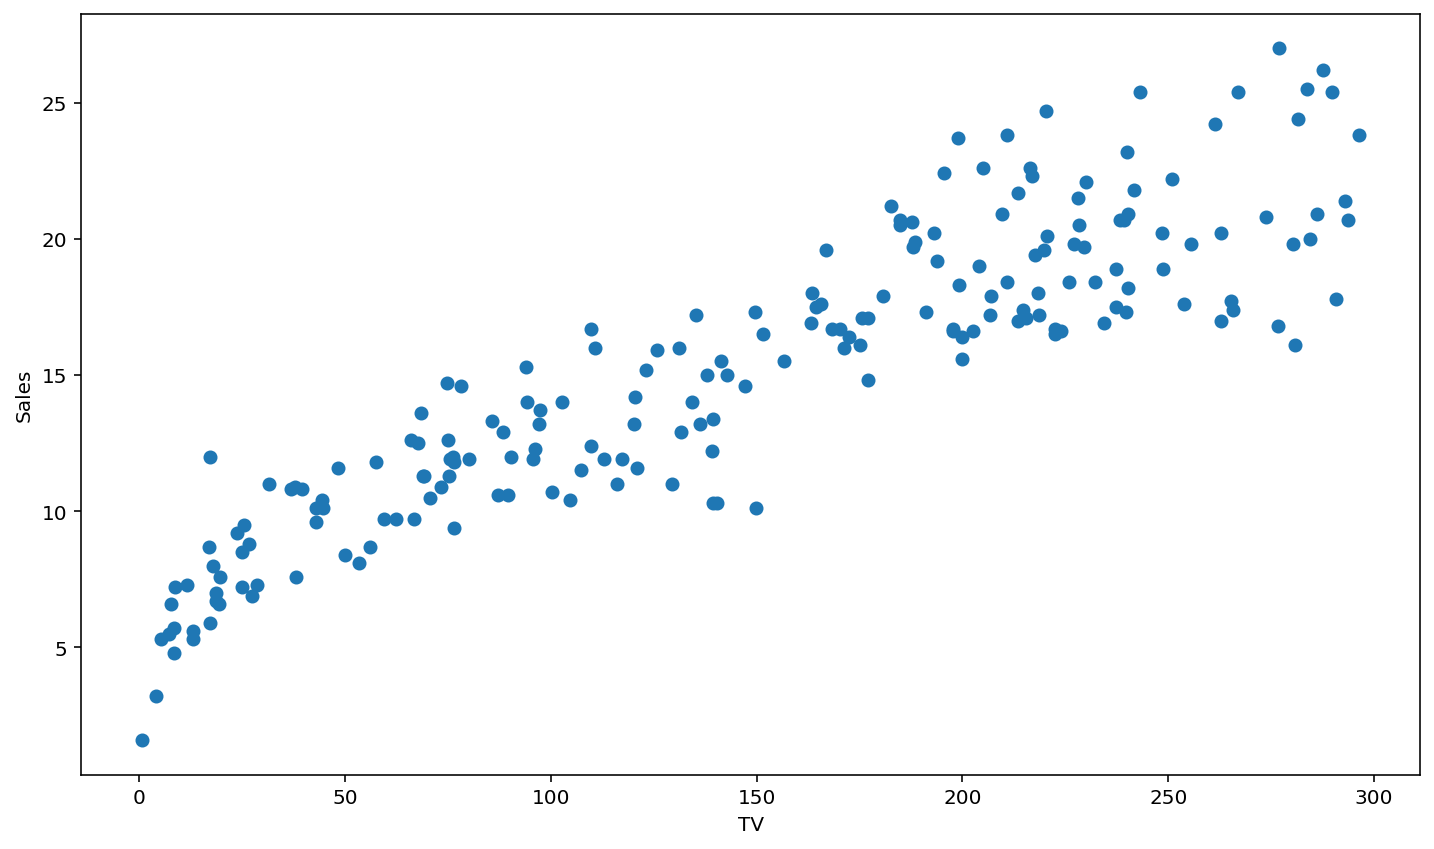

In [81]:
plt.scatter(x1["TV"], x1["Sales"])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [82]:
X = x1[["TV"]]
y = x1.Sales

X_train, X_test, y_train, y_test = train_test_split(X,y)
model = LinearRegression()
model.fit(X_train, y_train)

mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)
print(f'MSE : {mse}')
print(f'RMSE: {rmse}')
r2 = r2_score(y_test, model.predict(X_test))
print(f'R2 của TV score: {r2}')

MSE : 4.440346388964777
RMSE: 2.1072129434313887
R2 của TV score: 0.799162083232103


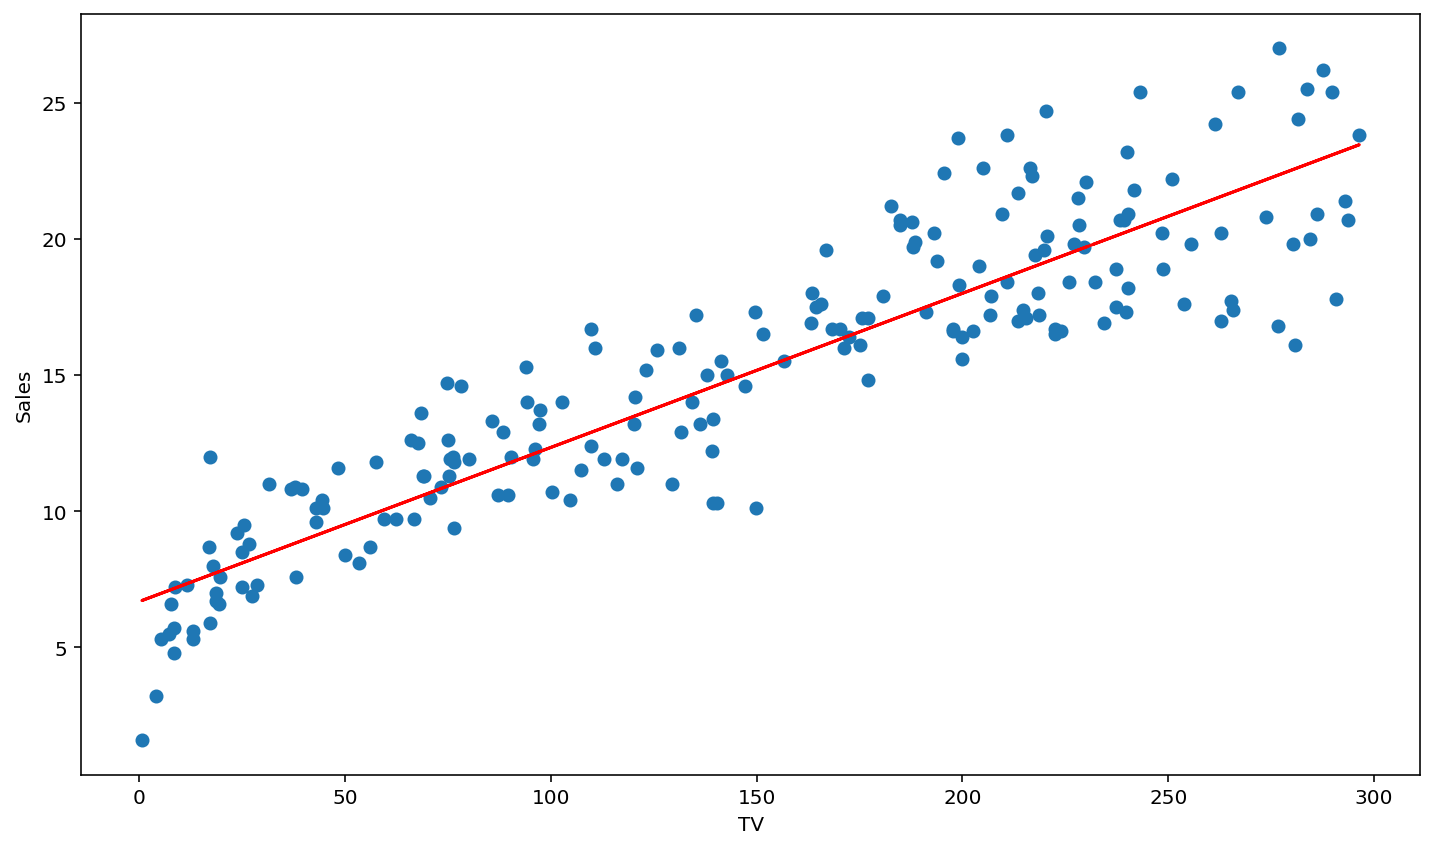

Intercept (hệ số chắn): 6.680437162971321, Coef (Hệ số góc): [0.05659561]


In [83]:
b1 = model.intercept_
b2 = model.coef_
plt.scatter(x1["TV"], x1["Sales"])
plt.plot(x1["TV"], b1 + b2 * x1["TV"], color='r' )
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

print(f"Intercept (hệ số chắn): {b1}, Coef (Hệ số góc): {b2}")


# <span style='color:#607d8b'>**Mô hình 2: Radio**</span>



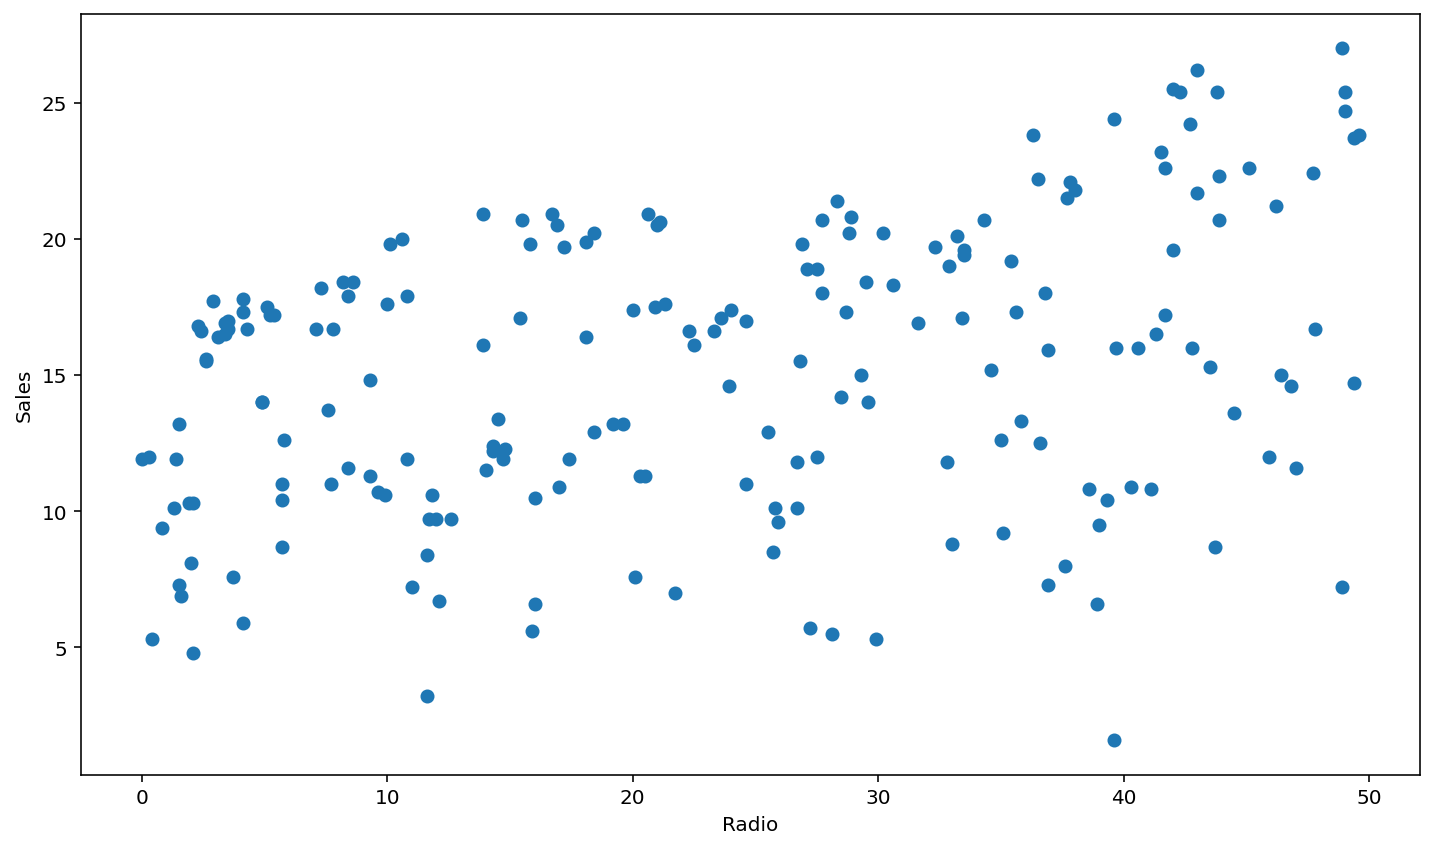

In [84]:
plt.scatter(x2["Radio"], x2["Sales"])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

In [85]:
X = x2[["Radio"]]
y = x2.Sales

X_train, X_test, y_train, y_test = train_test_split(X,y)
model = LinearRegression()
model.fit(X_train, y_train)

mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)
print(f'MSE : {mse:}')
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, model.predict(X_test))
print(f'R2 của Radio score: {r2}')

MSE : 21.843312733176532
RMSE: 4.673682994510489
R2 của Radio score: 0.11650465507260832


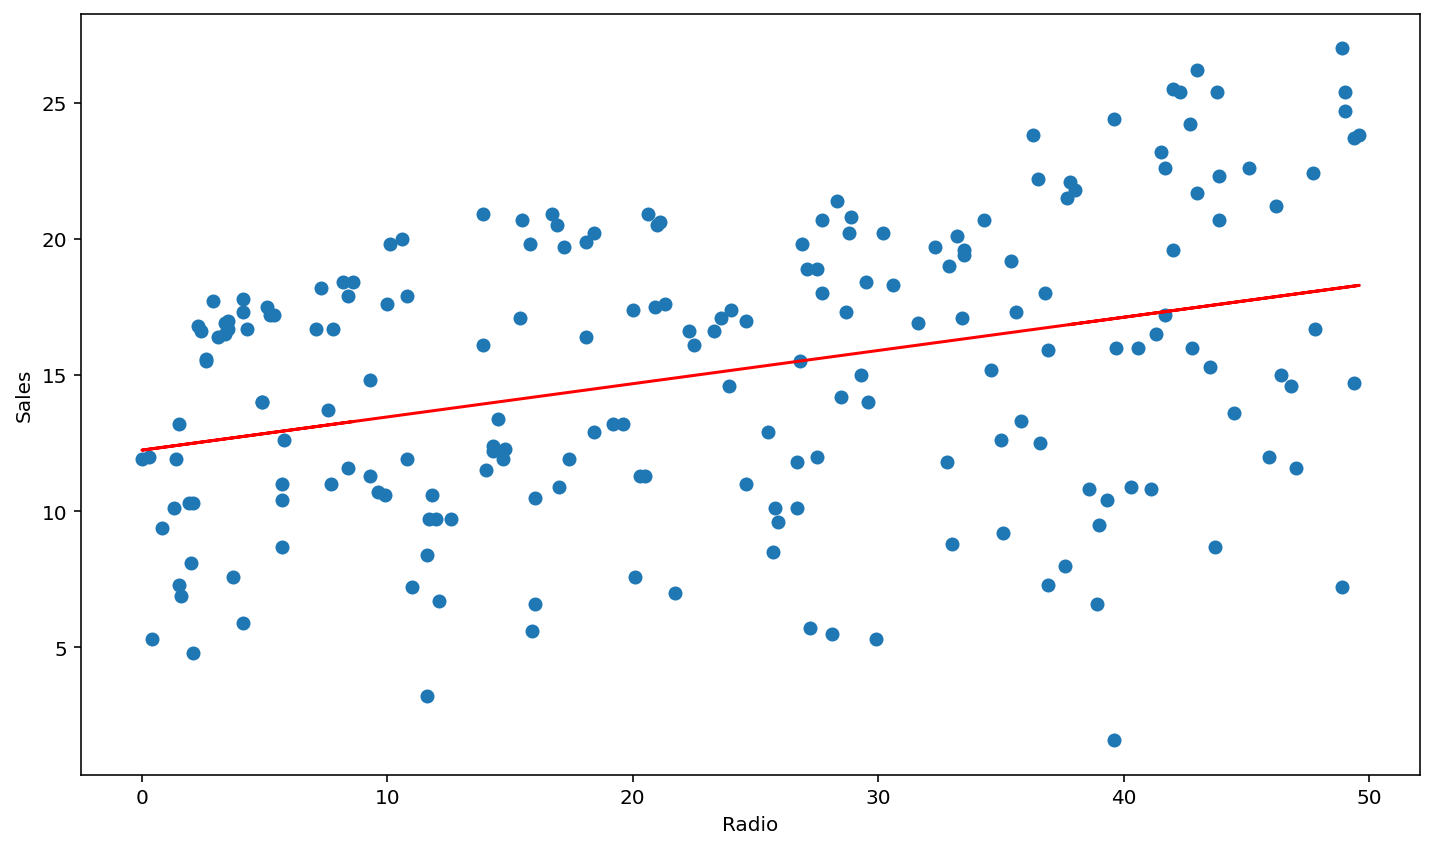

Intercept (hệ số chắn): 12.241293169000157, Coef (Hệ số góc): [0.12199576]


In [86]:
b1 = model.intercept_
b2 = model.coef_

plt.scatter(x2["Radio"], x2["Sales"])
plt.plot(x2["Radio"], b1 + b2 * x2["Radio"], color='r')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

print(f"Intercept (hệ số chắn): {b1}, Coef (Hệ số góc): {b2}")

# <span style='color:#607d8b'>**Mô hình 3: Newspaper**</span>



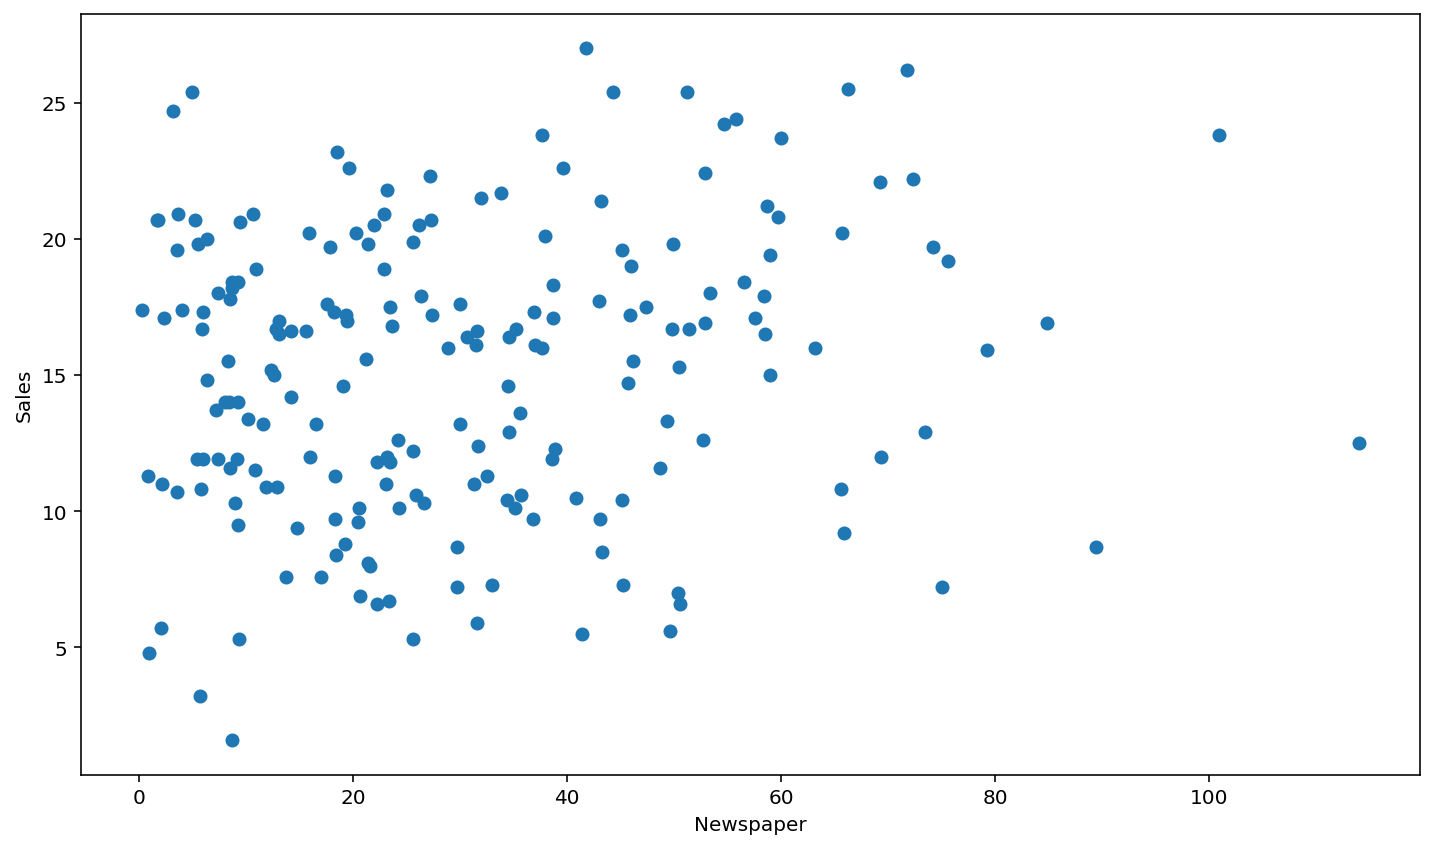

In [87]:
plt.scatter(x3["Newspaper"], x3["Sales"])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

In [88]:
X = x3[["Newspaper"]]
y = x3.Sales

X_train, X_test, y_train, y_test = train_test_split(X,y)
model = LinearRegression()
model.fit(X_train, y_train)

mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)
print(f'MSE : {mse}')
print(f'RMSE: {rmse}')
r2 = r2_score(y_test, model.predict(X_test))
print(f'R2 của Newspaper score: {r2}')

MSE : 30.72691338042152
RMSE: 5.543186211956217
R2 của Newspaper score: 0.03214089448798729


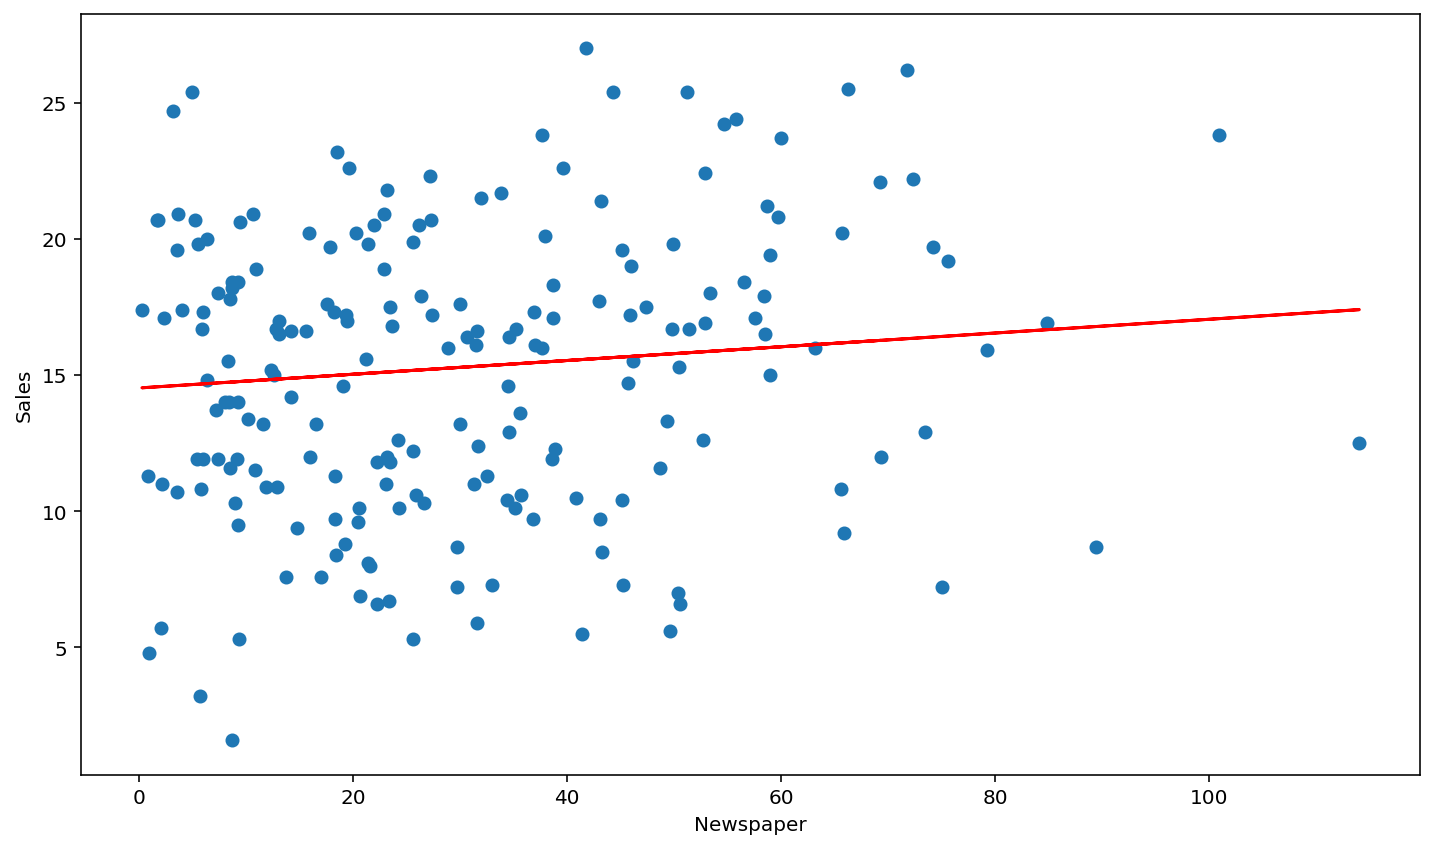

Intercept (hệ số chắn): 14.52317636677886, Coef (Hệ số góc): [0.02523644] 


In [89]:
b1 = model.intercept_
b2 = model.coef_
plt.scatter(x3["Newspaper"], x3["Sales"])
plt.plot(x3["Newspaper"], b1 + b2 * x3["Newspaper"], color='r' )
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()
print(f"Intercept (hệ số chắn): {b1}, Coef (Hệ số góc): {b2} ")


# <span style='color:#607d8b'>**Mô hình 4: TV \+ Radio**</span>



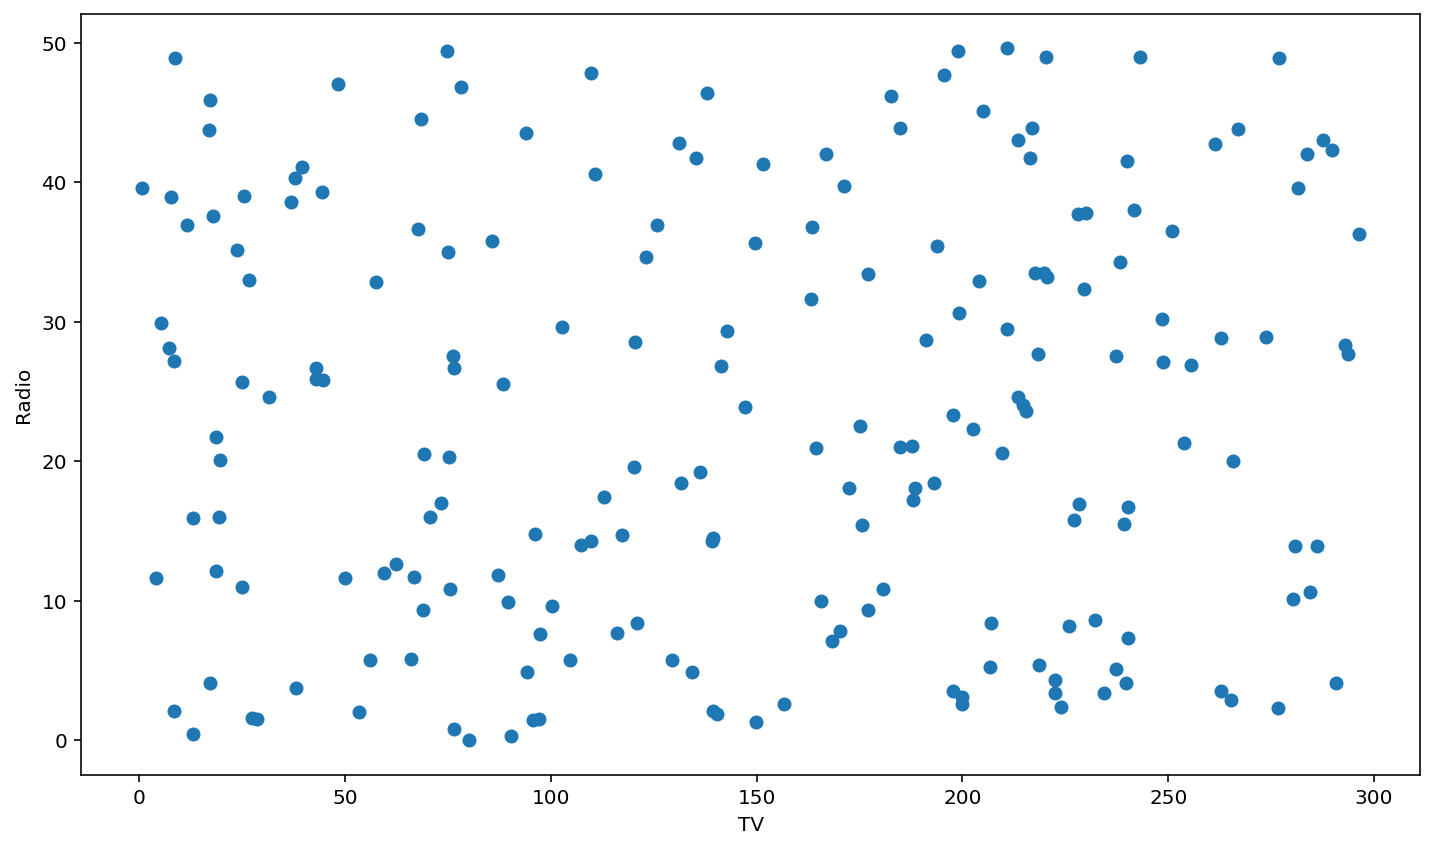

In [90]:
plt.scatter(x_without_outlier["TV"], x_without_outlier["Radio"])
plt.xlabel('TV')
plt.ylabel('Radio')
plt.show()

In [91]:
X = x_without_outlier[["TV"]]
y = x_without_outlier.Radio

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()
model.fit(X_train, y_train)

mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)
print(f'MSE : {mse}')
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, model.predict(X_test))
print(f'R2 của TV và Radio score: {r2}')

MSE : 232.15673402573614
RMSE: 15.23669038950835
R2 của TV và Radio score: -0.005132804458758855


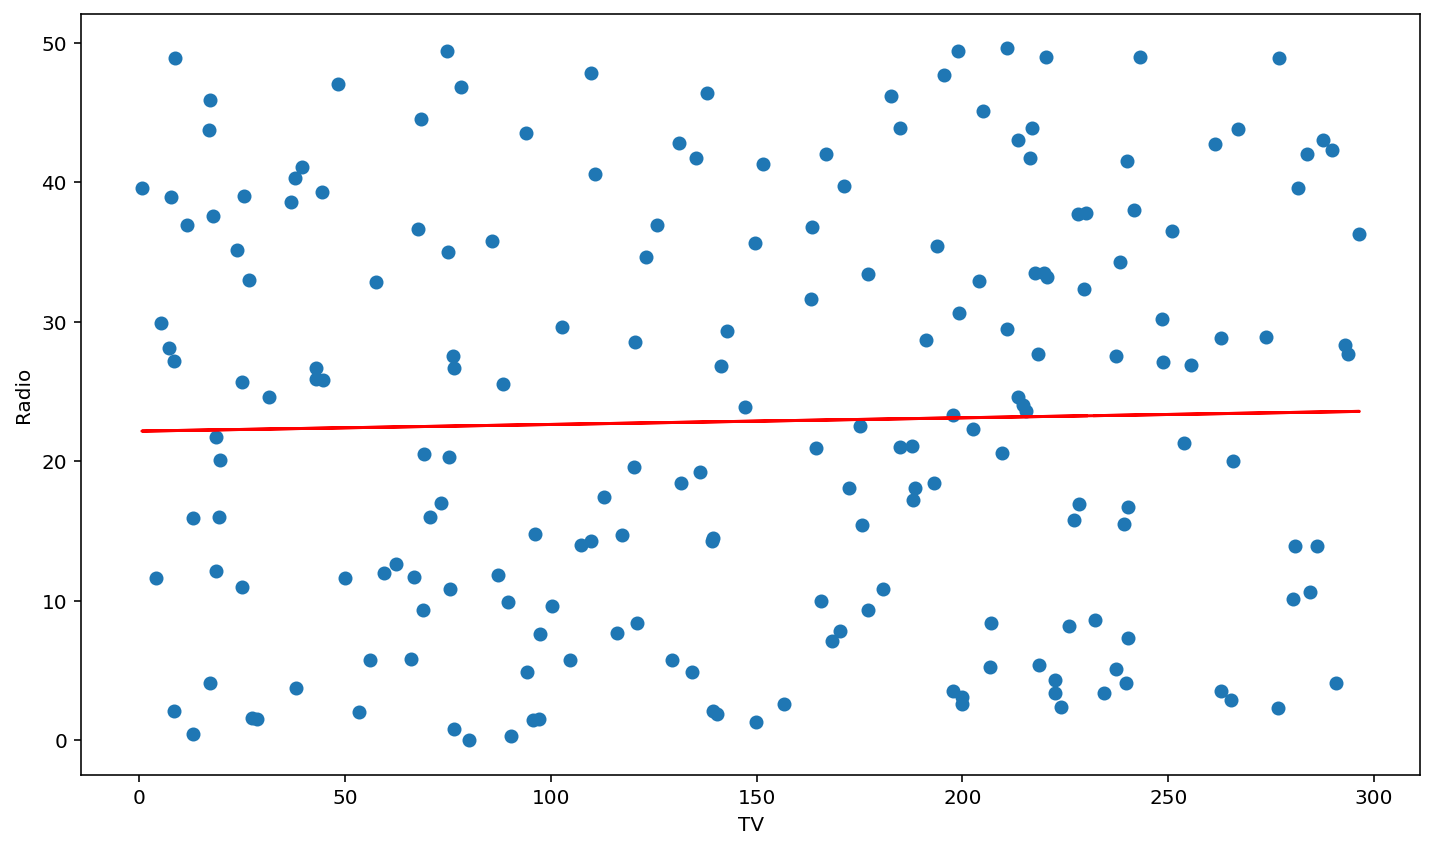

Intercept (hệ số chắn): 22.144202119978033, Coef (Hệ số góc): [0.00477619]


In [92]:
b1 = model.intercept_
b2 = model.coef_
plt.scatter(x_without_outlier["TV"], x_without_outlier["Radio"])
plt.plot(x_without_outlier["TV"], b1 + b2 * x_without_outlier["TV"], color='r' )
plt.xlabel('TV')
plt.ylabel('Radio')
plt.show()

print(f"Intercept (hệ số chắn): {b1}, Coef (Hệ số góc): {b2}")

# <span style='color:#607d8b'>**Mô hình 5: TV \+ Newspaper**</span>



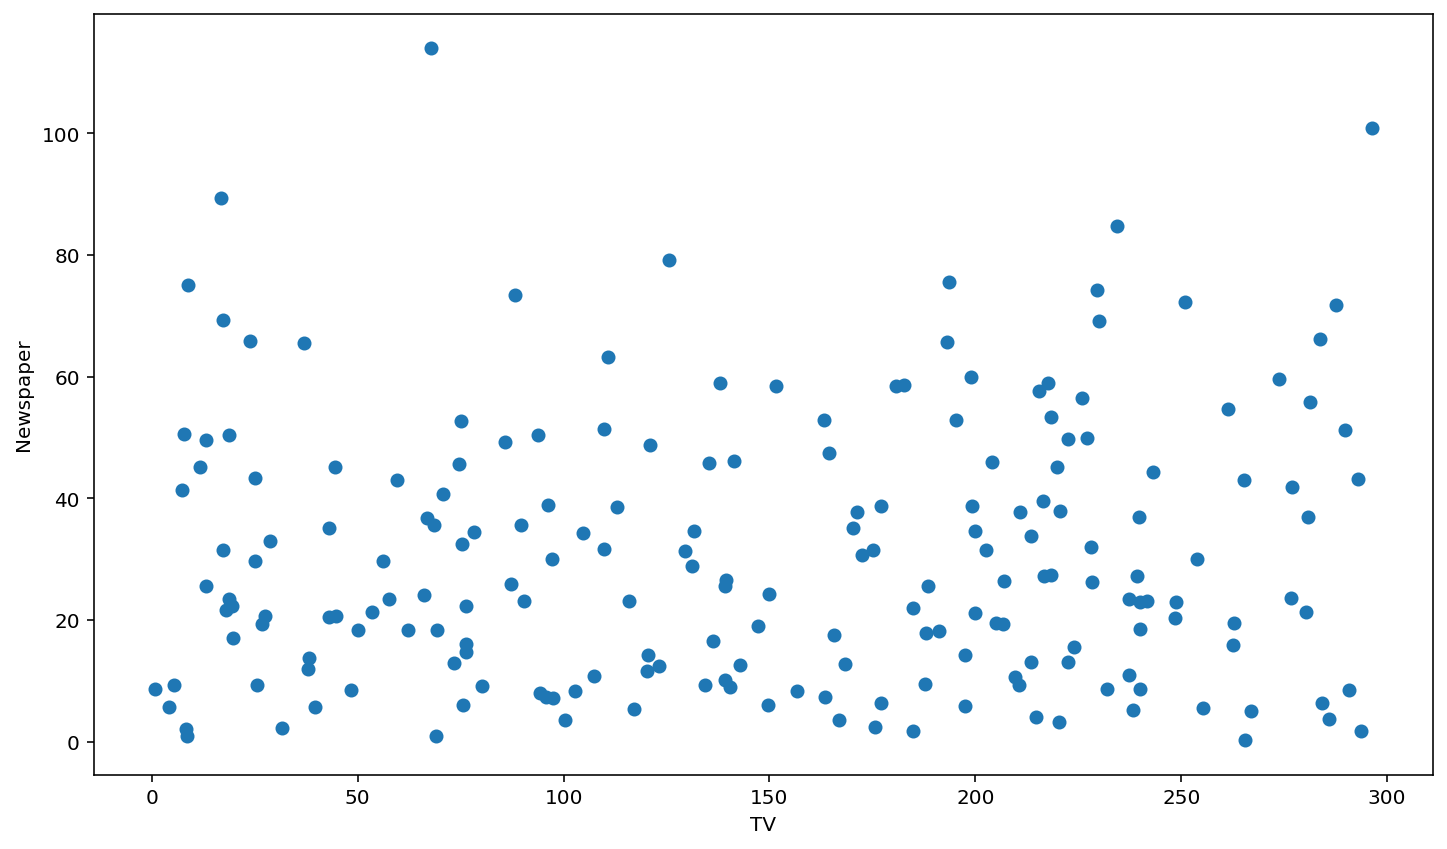

In [93]:
plt.scatter(data["TV"], data["Newspaper"])
plt.xlabel('TV')
plt.ylabel('Newspaper')
plt.show()

In [94]:
X = data[["TV"]]
y = data.Newspaper

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()
model.fit(X_train, y_train)

mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)
print(f'MSE : {mse}')
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, model.predict(X_test))
print(f'R2 của TV và Newspaper score: {r2}')

MSE : 563.0042996981401
RMSE: 23.72771164057209
R2 của TV và Newspaper score: 0.002774823049252362


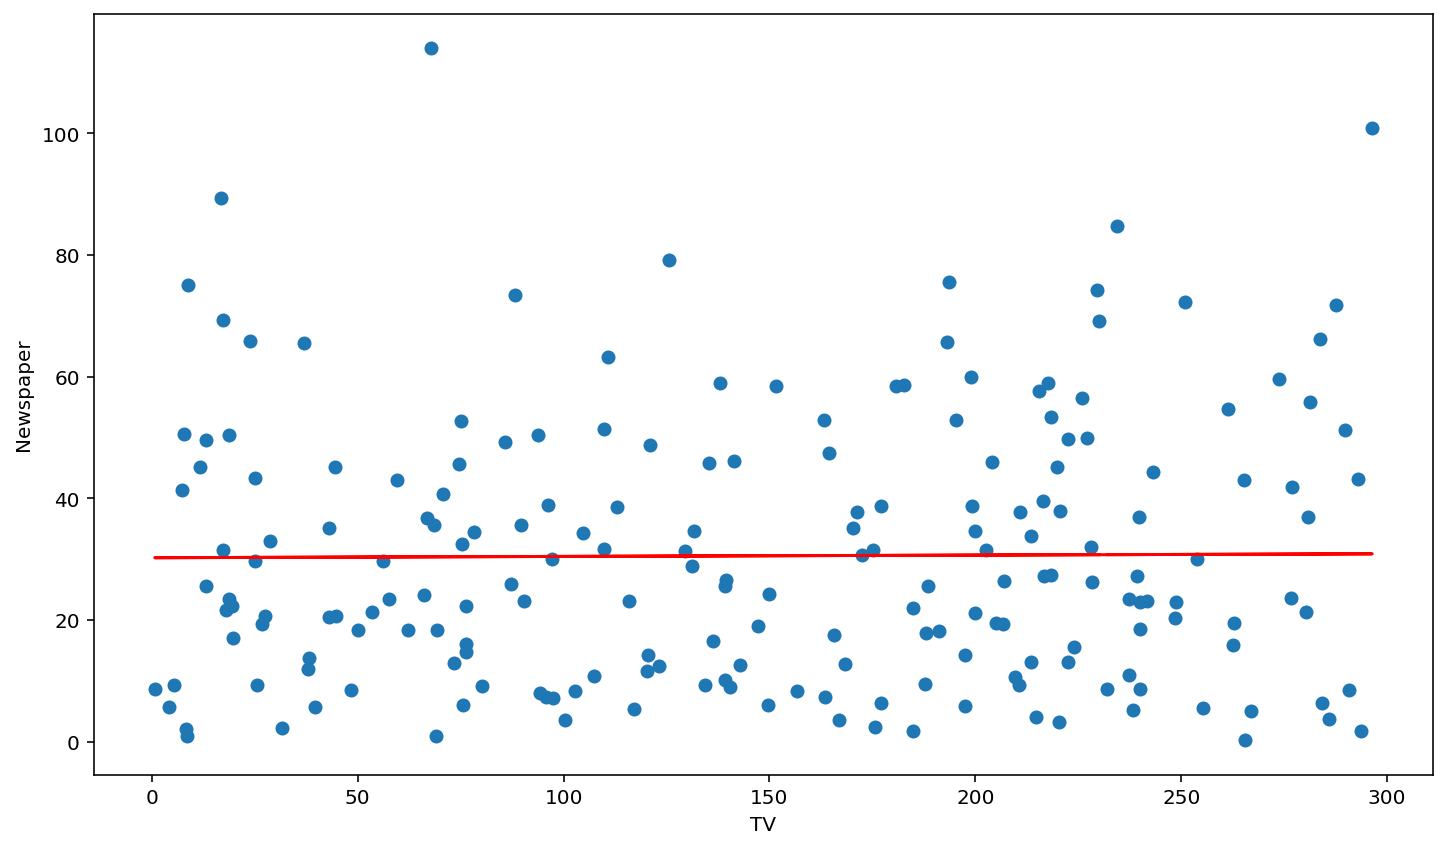

Intercept (hệ số chắn): 30.255276368249106, Coef (Hệ số góc): [0.00216425] 


In [95]:
b1 = model.intercept_
b2 = model.coef_


plt.scatter(data["TV"], data["Newspaper"])
plt.plot(data["TV"], b1 + b2 * data["TV"], color='r' )
plt.xlabel('TV')
plt.ylabel('Newspaper')
plt.show()
print(f"Intercept (hệ số chắn): {b1}, Coef (Hệ số góc): {b2} ")


# <span style='color:#607d8b'>**Mô hình 6: Radio \+ Newspaper**</span>



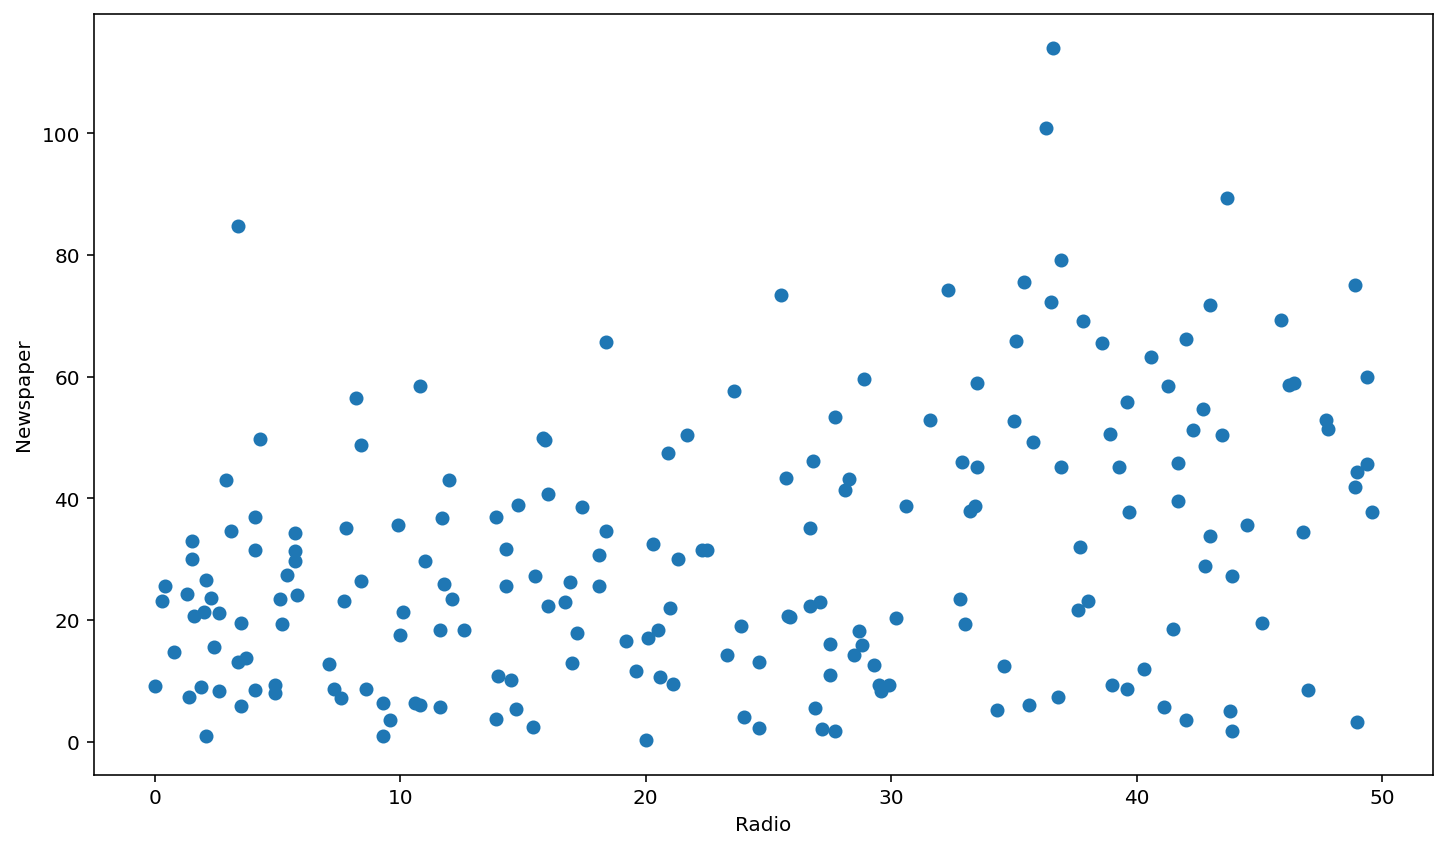

In [96]:
plt.scatter(data["Radio"], data["Newspaper"])
plt.xlabel('Radio')
plt.ylabel('Newspaper')
plt.show()

In [97]:
X = data[["Radio"]]
y = data.Newspaper

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()
model.fit(X_train, y_train)

mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)
print(f'MSE : {mse}')
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, model.predict(X_test))
print(f'R2 của Radio và Newspaper score: {r2}')

MSE : 312.2077620468088
RMSE: 17.669401858772943
R2 của Radio và Newspaper score: 0.21909780443573446


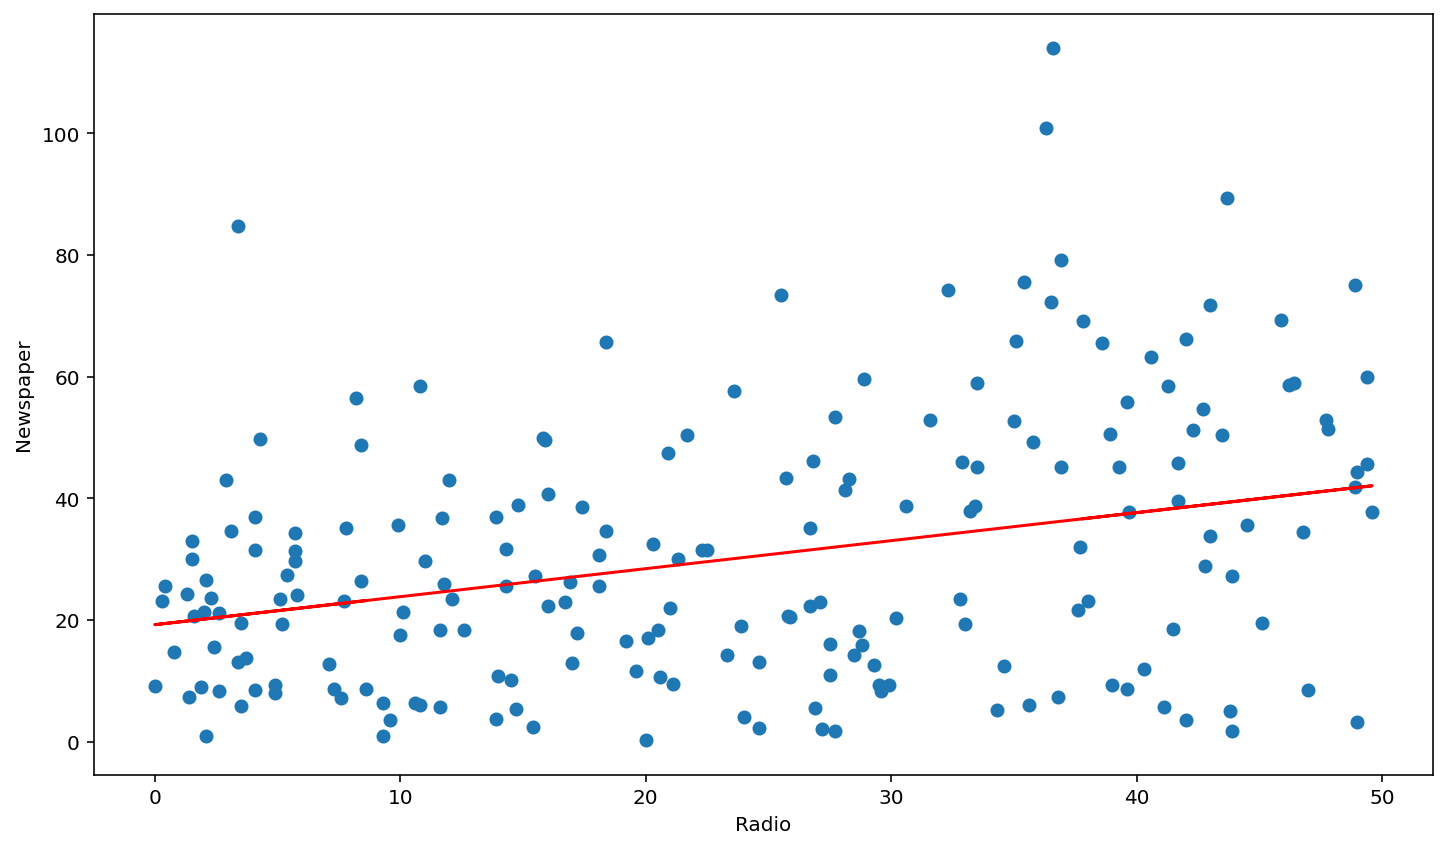

Intercept (hệ số chắn): 19.251722998384455, Coef (Hệ số góc): [0.46032218] 


In [98]:
b1 = model.intercept_
b2 = model.coef_
plt.scatter(data["Radio"], data["Newspaper"])
plt.plot(data["Radio"], b1 + b2 * data["Radio"], color='r' )
plt.xlabel('Radio')
plt.ylabel('Newspaper')
plt.show()

print(f"Intercept (hệ số chắn): {b1}, Coef (Hệ số góc): {b2} ")

# <span style='color:#607d8b'>**Mô hình 7: TV \+ Radio \+ Newspaper**</span>



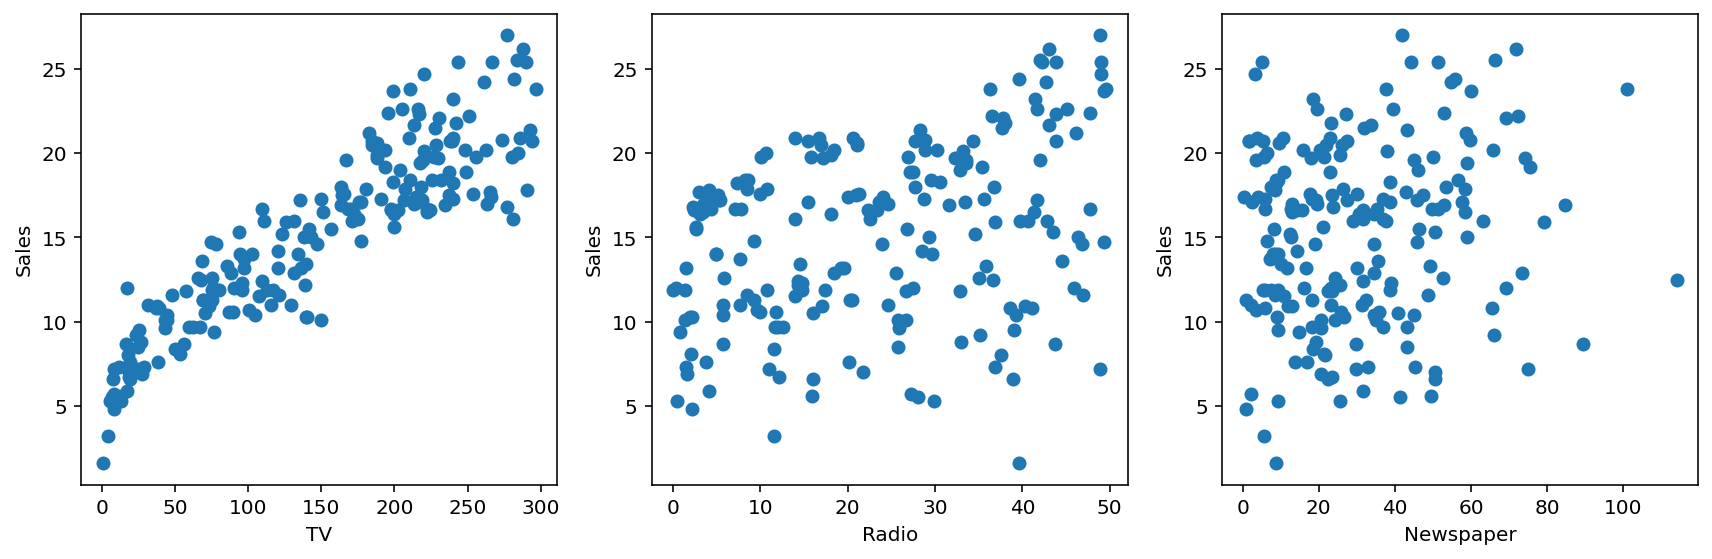

In [99]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(data["TV"], data["Sales"])
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(132)
plt.scatter(data["Radio"], data["Sales"])
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.subplot(133)
plt.scatter(data["Newspaper"], data["Sales"])
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

In [101]:
X = data[["TV", "Radio", "Newspaper"]]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()
model.fit(X_train, y_train)

mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)
print(f'MSE : {mse}')
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, model.predict(X_test))
print(f'R2 của TV, Radio và Newspaper score: {r2}')


MSE : 2.284149758194461
RMSE: 1.5113403846236828
R2 của TV, Radio và Newspaper score: 0.9222662041130304


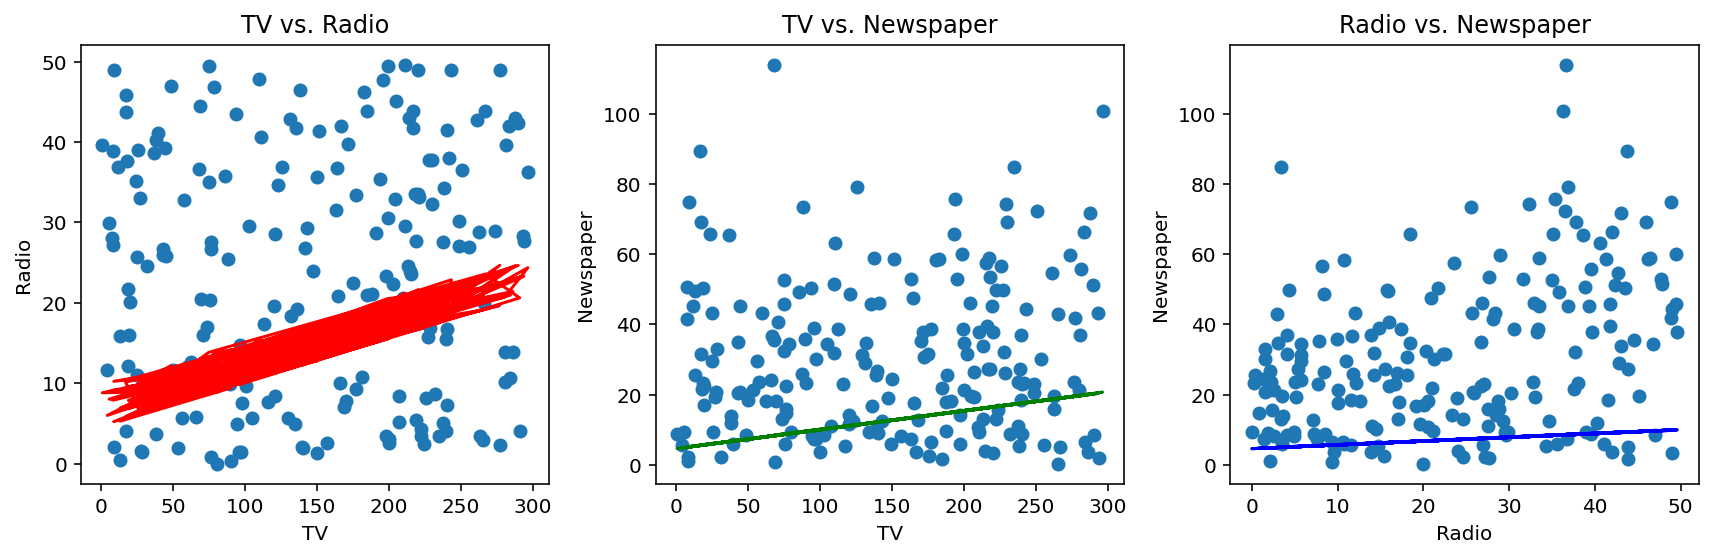

Intercept (hệ số chắn): 4.53620663004188, Coef (Hệ số góc): [0.05379591 0.10704752 0.00199087]


In [102]:
b1 = model.intercept_
b2 = model.coef_

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131)
ax1.scatter(data["TV"], data["Radio"])
ax1.set_xlabel('TV')
ax1.set_ylabel('Radio')
ax1.plot(data["TV"], b1 + b2[0] * data["TV"] + b2[1] * data["Radio"], color='r')
ax1.set_title('TV vs. Radio')

ax2 = fig.add_subplot(132)
ax2.scatter(data["TV"], data["Newspaper"])
ax2.set_xlabel('TV')
ax2.set_ylabel('Newspaper')
ax2.plot(data["TV"], b1 + b2[0] * data["TV"] + b2[2] * data["Newspaper"], color='g')
ax2.set_title('TV vs. Newspaper')

ax3 = fig.add_subplot(133)
ax3.scatter(data["Radio"], data["Newspaper"])
ax3.set_xlabel('Radio')
ax3.set_ylabel('Newspaper')
ax3.plot(data["Radio"], b1 + b2[1] * data["Radio"] + b2[2] * data["Newspaper"], color='b')
ax3.set_title('Radio vs. Newspaper')

plt.tight_layout()
plt.show()

print(f"Intercept (hệ số chắn): {b1}, Coef (Hệ số góc): {b2}")

**R2 của TV, Radio và Newspaper score: 0.9222662041130304 mang chỉ số CAO NHẤT \-\-&gt;** <u>Mô hình 7 là mô hình tốt nhất cho việc dự đoán</u>

**R2 của TV và Radio score: \-0.005132804458758855 mang chỉ số THẤP NHẤT \-\-&gt;** <u>Mô hình 4 là mô hình tệ nhất cho việc dự đoán</u>
